# import libraries

In [70]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# Download file

In [3]:
smokers_health=pd.read_csv('/Users/roaa/Downloads/smoking_health.csv')
smokers_health

,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol
0,54,male,yes,95,110/72,NaN,219.0
1,45,male,yes,64,121/72,NaN,248.0
2,58,male,yes,81,127.5/76,NaN,235.0
3,42,male,yes,90,122.5/80,NaN,225.0
4,42,male,yes,62,119/80,NaN,226.0
...,...,...,...,...,...,...,...
3895,37,male,yes,88,122.5/82.5,60.0,254.0
3896,49,male,yes,70,123/75,60.0,213.0
3897,56,male,yes,70,125/79,60.0,246.0
3898,50,male,yes,85,134/95,60.0,340.0


# Scan and clean data

In [5]:
smokers_health.isnull().sum()

age                0
sex                0
current_smoker     0
heart_rate         0
blood_pressure     0
cigs_per_day      14
chol               7
dtype: int64

In [13]:
smokers_health['cigs_per_day'].mean()

9.168553782810088

In [16]:
smokers_health['cigs_per_day']=smokers_health['cigs_per_day'].fillna(9)

In [17]:
smokers_health.dropna(subset=['chol'],inplace=True) 

In [18]:
smokers_health.isnull().sum()

age               0
sex               0
current_smoker    0
heart_rate        0
blood_pressure    0
cigs_per_day      0
chol              0
dtype: int64

# Data exploration 

In [19]:
smokers_health.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3893 entries, 0 to 3899
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             3893 non-null   int64  
 1   sex             3893 non-null   object 
 2   current_smoker  3893 non-null   object 
 3   heart_rate      3893 non-null   int64  
 4   blood_pressure  3893 non-null   object 
 5   cigs_per_day    3893 non-null   float64
 6   chol            3893 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 243.3+ KB


In [27]:
smokers_health.describe().round()

,age,heart_rate,cigs_per_day,chol
count,3893.0,3893.0,3893.0,3893.0
mean,50.0,76.0,9.0,237.0
std,9.0,12.0,12.0,44.0
min,32.0,44.0,0.0,113.0
25%,42.0,68.0,0.0,206.0
50%,49.0,75.0,0.0,234.0
75%,56.0,82.0,20.0,263.0
max,70.0,143.0,70.0,696.0


In [31]:
smokers_health.loc[smokers_health['chol']>=690.0]

,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol
2402,51,male,yes,95,157/87,9.0,696.0


In [33]:
smokers_health.loc[smokers_health['chol']>=500.0]
#The highest possible cholesterol level is 499, so these values are considered unreal (abnormal).

,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol
1381,52,female,no,78,159.5/94,0.0,600.0
2402,51,male,yes,95,157/87,9.0,696.0


In [40]:
smokers_health.loc[smokers_health['chol']>=500.0]=np.nan

In [44]:
smokers_health.dropna(inplace=True)

In [45]:
smokers_health.describe().round()

,age,heart_rate,cigs_per_day,chol
count,3891.0,3891.0,3891.0,3891.0
mean,50.0,76.0,9.0,236.0
std,9.0,12.0,12.0,43.0
min,32.0,44.0,0.0,113.0
25%,42.0,68.0,0.0,206.0
50%,49.0,75.0,0.0,234.0
75%,56.0,82.0,20.0,263.0
max,70.0,143.0,70.0,464.0


In [49]:
smokers_health.loc[smokers_health['cigs_per_day']>=40]
#The highest possible limit for smoking per day is 40 and above that is considered an extreme and abnormal value

,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol
3750,49.0,male,yes,67.0,142/54,40.0,260.0
3751,43.0,male,yes,90.0,103.5/60,40.0,226.0
3752,39.0,male,yes,65.0,112.5/60,40.0,218.0
3753,59.0,male,yes,75.0,111/72,40.0,188.0
3754,37.0,female,yes,77.0,109/72,40.0,224.0
...,...,...,...,...,...,...,...
3895,37.0,male,yes,88.0,122.5/82.5,60.0,254.0
3896,49.0,male,yes,70.0,123/75,60.0,213.0
3897,56.0,male,yes,70.0,125/79,60.0,246.0
3898,50.0,male,yes,85.0,134/95,60.0,340.0


In [59]:
smokers_health.loc[smokers_health['cigs_per_day']>40]=np.nan

In [61]:
smokers_health.dropna(inplace=True)

In [62]:
smokers_health.describe().round()

,age,heart_rate,cigs_per_day,chol
count,3741.0,3741.0,3741.0,3741.0
mean,50.0,76.0,8.0,236.0
std,9.0,12.0,10.0,44.0
min,32.0,44.0,0.0,113.0
25%,42.0,67.0,0.0,205.0
50%,49.0,75.0,0.0,234.0
75%,56.0,82.0,20.0,263.0
max,70.0,143.0,38.0,464.0


# Data plot & analysis

In [63]:
smokers_health

,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol
0,54.0,male,yes,95.0,110/72,9.0,219.0
1,45.0,male,yes,64.0,121/72,9.0,248.0
2,58.0,male,yes,81.0,127.5/76,9.0,235.0
3,42.0,male,yes,90.0,122.5/80,9.0,225.0
4,42.0,male,yes,62.0,119/80,9.0,226.0
...,...,...,...,...,...,...,...
3745,54.0,male,yes,82.0,146/91,35.0,240.0
3746,48.0,male,yes,90.0,132/91,35.0,263.0
3747,44.0,male,yes,68.0,144/99,35.0,217.0
3748,59.0,female,yes,83.0,182.5/103,35.0,345.0


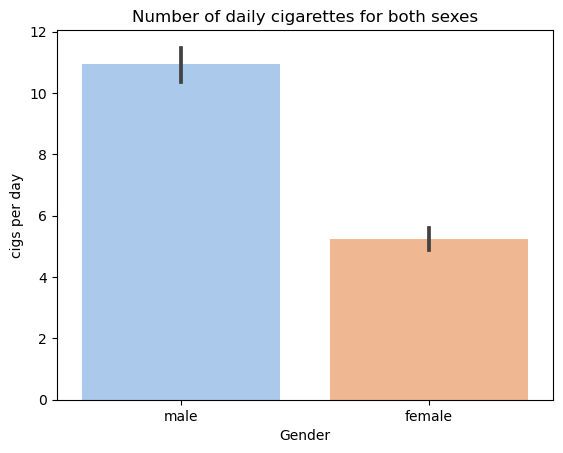

In [83]:
sns.barplot(x=smokers_health['sex'],y=smokers_health['cigs_per_day'],palette='pastel')
plt.xlabel('Gender')
plt.ylabel('cigs per day')
plt.title('Number of daily cigarettes for both sexes')
plt.show()

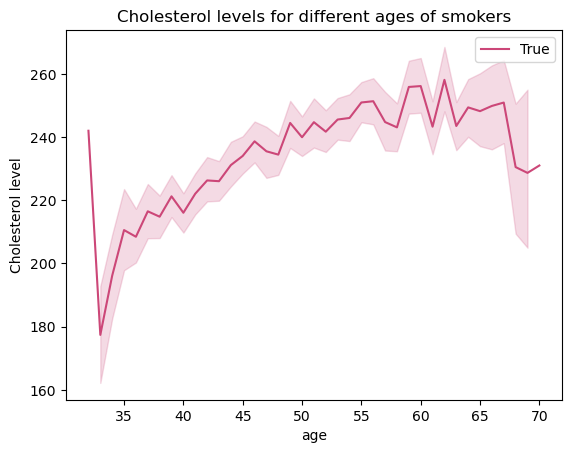

In [97]:
#plt.figure(figsize=(15,10))
sns.lineplot(x=smokers_health['age'].astype(int),y=smokers_health['chol'],hue=True,palette='plasma')
plt.xlabel('age')
plt.ylabel('Cholesterol level')
plt.title('Cholesterol levels for different ages of smokers')
plt.show()

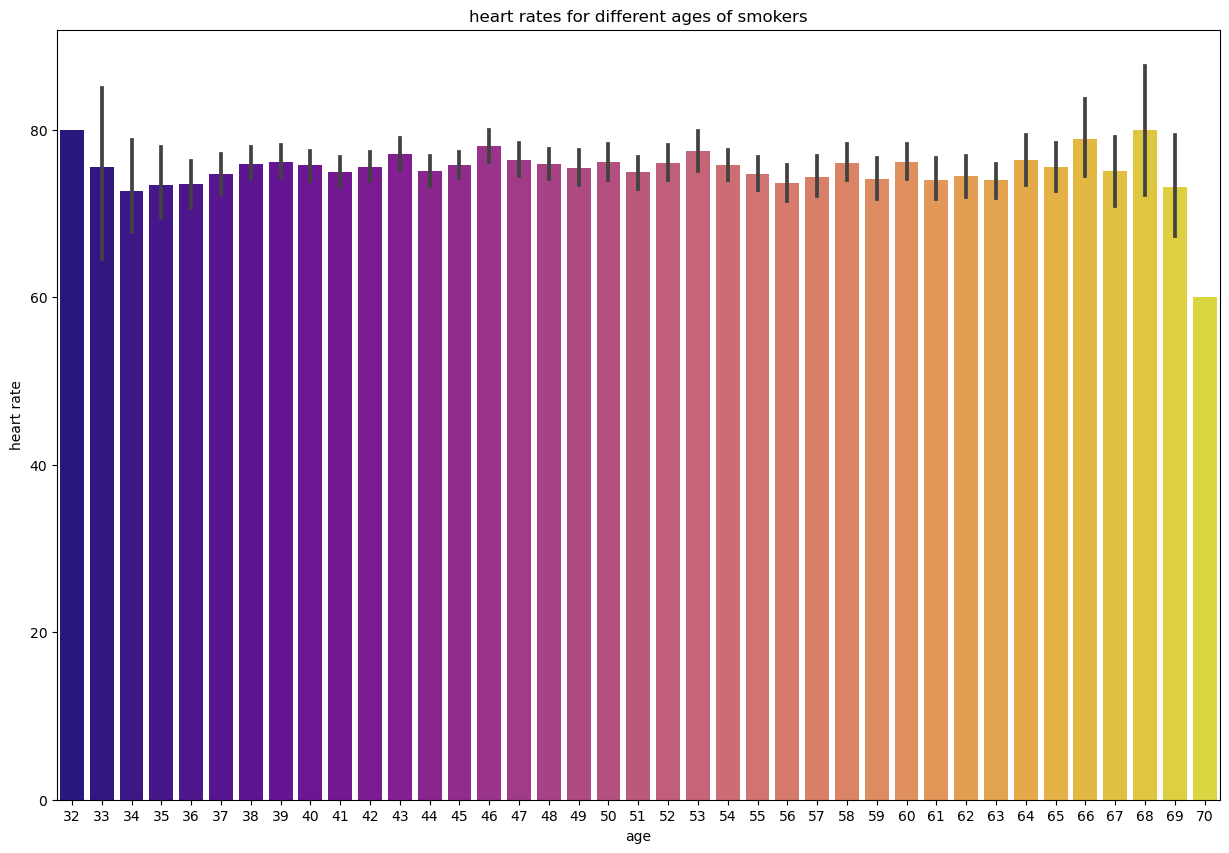

In [104]:
plt.figure(figsize=(15,10))
sns.barplot(x=smokers_health['age'].astype(int),y=smokers_health['heart_rate'],palette='plasma')
plt.xlabel('age')
plt.ylabel('heart rate')
plt.title('heart rates for different ages of smokers')
plt.show()

# Documenting the results

In [105]:
smokers_health.to_excel('smokers_health.xlsx')